In [64]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from LOTUS_regression.predictors.seasonal import add_seasonal_components
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

In [31]:
predictors = load_data('pred_baseline_ilt.csv')
predictors.index

DatetimeIndex(['1977-02-01', '1977-03-01', '1977-04-01', '1977-05-01',
               '1977-06-01', '1977-07-01', '1977-08-01', '1977-09-01',
               '1977-10-01', '1977-11-01',
               ...
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01'],
              dtype='datetime64[ns]', name='time', length=485, freq=None)

In [46]:
linearpre = predictors.loc['1977-02-01':'1997-01-01']['linear_pre'].tolist()
#print(linearpre, len(linearpre))
tind = predictors.loc['1977-02-01':'1997-01-01'].index
tind

DatetimeIndex(['1977-02-01', '1977-03-01', '1977-04-01', '1977-05-01',
               '1977-06-01', '1977-07-01', '1977-08-01', '1977-09-01',
               '1977-10-01', '1977-11-01',
               ...
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01'],
              dtype='datetime64[ns]', name='time', length=240, freq=None)

In [50]:
forthyear = [0]*480
twentyyear = [0]*240

for t in range(480):
    forthyear[t] = t+1
    if(t >=240): twentyyear[t-240] = t+1
#print(forthyear, twentyyear)

In [58]:
uccles = pd.read_csv('/home/poyraden//MLR_Uccle/Files/1km_monthlymean.csv')
uccles.rename(columns={'Unnamed: 0':'date'}, inplace=True)
uccles['date'] =  pd.to_datetime(uccles['date'], format='%Y-%m')
uccles.set_index('date', inplace=True)
#uccles_time = uccles.loc['1969-01-01':'1977-01-01']

tuc = uccles.loc['1969-01-01':'1977-01-01'].index

In [112]:
tuc

DatetimeIndex(['1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01', '1969-07-01', '1969-08-01',
               '1969-09-01', '1969-10-01', '1969-11-01', '1969-12-01',
               '1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01', '1970-11-01', '1970-12-01',
               '1971-01-01', '1971-02-01', '1971-03-01', '1971-04-01',
               '1971-05-01', '1971-06-01', '1971-07-01', '1971-08-01',
               '1971-09-01', '1971-10-01', '1971-11-01', '1971-12-01',
               '1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01',
               '1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
      

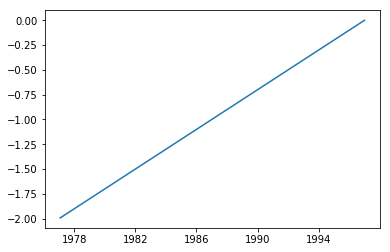

In [111]:
plt.plot(tind, linearpre)


In [77]:
#tr = tind.
reg_0 = LinearRegression().fit(np.array(twentyyear).reshape(-1, 1), linearpre)

s0 = reg_0.coef_
s0

array([ 0.00833357])

In [89]:
dif = [0]*240
linearpre[239]


-0.0

In [123]:
for d in range(240):
    dif[d] = linearpre[d] - linearpre[d-1]
    #print(d, linearpre[d], linearpre[d] - linearpre[d-1], dif[d])
linearpre[0]

-1.9915535568834404

In [131]:
print(1977-1969)
(pd.Timestamp('1969-01-01') -pd.Timestamp('1977-02-01'))/np.timedelta64(1, 'M')
(pd.Timestamp('2018-12-01') -pd.Timestamp('2017-06-01'))/np.timedelta64(1, 'M')


8


18.004476477956427

In [126]:
preext = [0]*99
preext[0] = -1.9915535568834404
for e in range(98):
    preext[e+1] = preext[e] - dif[239-e]
linear_pre_extension = preext[1:98]
print(len(linear_pre_extension), linear_pre_extension)


97 [-2.0000410686051047, -2.0082547896260703, -2.0167423013477346, -2.0249560223687, -2.0334435340903645, -2.0419310458120288, -2.0501447668329944, -2.0586322785546587, -2.0668459995756243, -2.0753335112972886, -2.083273441617555, -2.0917609533392194, -2.1002484650608837, -2.1084621860818493, -2.1169496978035136, -2.1251634188244792, -2.1336509305461435, -2.142138442267808, -2.1503521632887734, -2.1588396750104377, -2.1670533960314033, -2.1755409077530676, -2.1832070473726355, -2.1916945590942998, -2.200182070815964, -2.2083957918369297, -2.216883303558594, -2.2250970245795596, -2.233584536301224, -2.242072048022888, -2.250285769043854, -2.258773280765518, -2.2669870017864837, -2.275474513508148, -2.283140653127716, -2.29162816484938, -2.3001156765710444, -2.30832939759201, -2.3168169093136743, -2.32503063033464, -2.3335181420563043, -2.3420056537779685, -2.350219374798934, -2.3587068865205985, -2.366920607541564, -2.3754081192632284, -2.3830742588827962, -2.3915617706044605, -2.400049

In [127]:
#print(len(preext), preext)
#predictors.loc['1977-02-01':'1997-01-01']['linear_pre']

In [136]:
#predictors.loc['2001-01-01': '2017-06-01']['linear_post']

In [135]:
linearpost = predictors.loc['2000-02-01':'2017-06-01']['linear_post'].tolist()
print(len(linearpost), linearpost)

209 [0.008487511721664374, 0.016427442041931046, 0.02491495376359542, 0.03312867478456094, 0.04161618650622532, 0.04982990752719084, 0.05831741924885521, 0.06680493097051958, 0.07501865199148511, 0.08350616371314948, 0.091719884734115, 0.1002073964557794, 0.10869490817744376, 0.11636104779701158, 0.12484855951867595, 0.13306228053964148, 0.14154979226130585, 0.1497635132822714, 0.15825102500393573, 0.1667385367256001, 0.17495225774656564, 0.18343976946823, 0.19165349048919555, 0.2001410022108599, 0.20862851393252427, 0.21629465355209213, 0.2247821652737565, 0.232995886294722, 0.24148339801638635, 0.2496971190373519, 0.25818463075901626, 0.26667214248068066, 0.2748858635016462, 0.2833733752233105, 0.29158709624427603, 0.30007460796594043, 0.30856211968760483, 0.31622825930717263, 0.324715771028837, 0.3329294920498025, 0.3414170037714669, 0.3496307247924325, 0.3581182365140968, 0.3666057482357611, 0.3748194692567267, 0.3833069809783911, 0.3915207019993566, 0.4000082137210209, 0.408495725

In [166]:
difp = [0]*209
for dd in range(208):
    difp[dd] = linearpost[dd+1] - linearpost[dd]
    #print(dd, linearpost[dd],  difp[dd])
    
postext = [0]*21
postext[0] = 1.7330951354237254

for ep in range(20):
    postext[ep+1] = postext[ep] + difp[208-ep]
    
linear_post_extension = postext[2:20]
print(len(linear_post_extension),linear_post_extension)


18 [1.7415826471453897, 1.7497963681663553, 1.7582838798880194, 1.7659500195075875, 1.774437531229252, 1.7829250429509163, 1.7911387639718819, 1.799626275693546, 1.8078399967145118, 1.816327508436176, 1.8248150201578404, 1.833028741178806, 1.8415162529004703, 1.849729973921436, 1.8582174856431, 1.866157415963367, 1.8746449276850314, 1.8831324394066955]
